In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("mnist_train.csv")

In [3]:
data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = data['label']
new_data = data.drop('label', axis=1)

In [5]:
new_data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(new_data.shape)
print(labels.shape)

(60000, 784)
(60000,)


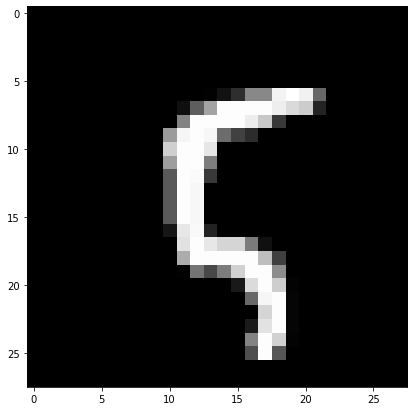

5


In [7]:
plt.figure(figsize=(7,7))
grid_data = new_data.iloc[100].values.reshape(28,28)
plt.imshow(grid_data, cmap="gray")
plt.show()
print(labels[100])

# PCA

In [10]:
labl = labels.head(15000)
dat = data.head(15000)

In [11]:
#data preprocessing 
from sklearn.preprocessing import StandardScaler
stand_data = StandardScaler().fit_transform(dat)
stand_data.shape

(15000, 785)

In [19]:
sample_data = stand_data
covar_matrix = np.matmul(sample_data.T, sample_data)

In [21]:
covar_matrix.shape

(785, 785)

In [23]:
from scipy.linalg import eigh

e_values, e_vectors = eigh(covar_matrix, eigvals=(782,783))

In [27]:
print (e_values.shape)
print (e_vectors.shape)
e_vectors = e_vectors.T

(2,)
(785, 2)


In [32]:
print(e_vectors.shape)
sample_data.T.shape

(2, 785)


(785, 15000)

In [33]:
new_cord = np.matmul(e_vectors,sample_data.T)

In [39]:
new_cords = np.vstack((new_cord,labl)).T
datafram = pd.DataFrame(data=new_cords,columns=["1st_Principal", "2nd_Principal", "label"])

In [40]:
datafram.head()

,1st_Principal,2nd_Principal,label
0,0.029326,4.448958,5.0
1,-2.545496,7.359792,0.0
2,-5.534506,-9.748769,4.0
3,3.907587,3.565090,1.0
4,-6.385205,-3.168333,9.0


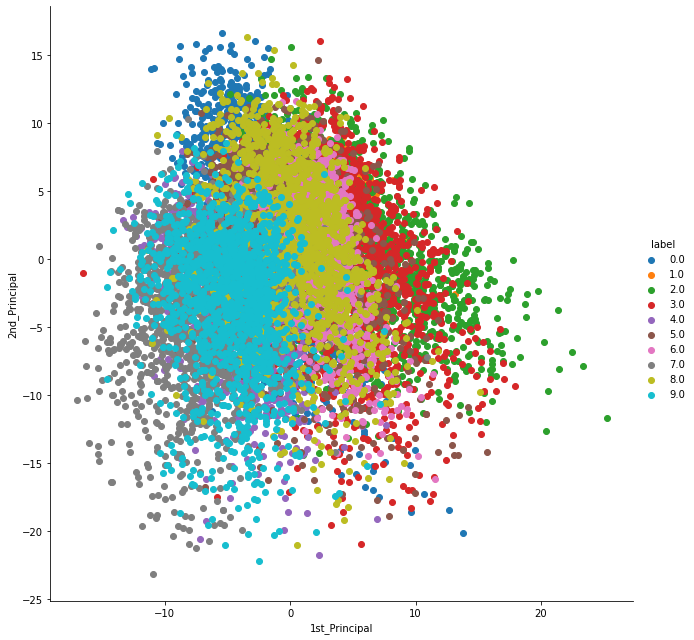

In [44]:
import seaborn as sns
sns.FacetGrid(datafram, hue="label", height=9).map(plt.scatter, "1st_Principal", "2nd_Principal").add_legend()
plt.show()

# PCA Using SKlearn 

In [45]:
from sklearn import decomposition
pca = decomposition.PCA()


In [46]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

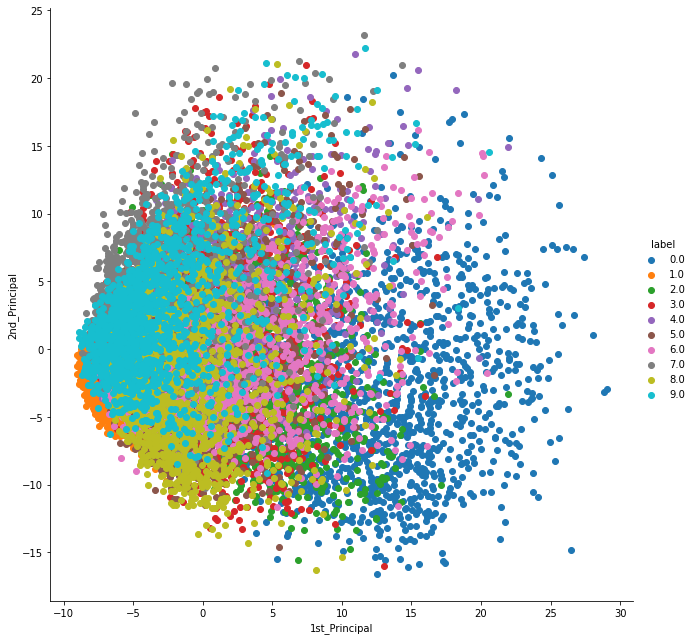

In [47]:
pca_data = np.vstack((pca_data.T, labl)).T
pca_df = pd.DataFrame(data=pca_data, columns=["1st_Principal", "2nd_Principal", "label"])
sns.FacetGrid(pca_df, hue="label", height=9).map(plt.scatter, "1st_Principal", "2nd_Principal").add_legend()
plt.show()

# T-SNE Stochastic Neighborhood Embedding